https://www.kaggle.com/datasets/datasnaek/league-of-legends?resource=download

In [81]:
import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

In [82]:
df = pd.read_csv('D:\Cosas\Desktop\games.csv')
df = df.sample(frac=0.04, random_state=0)

In [83]:
Y = pd.get_dummies(df['winner'])
Z = df[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills']] 

Z_train, Z_test, Yz_train, Yz_test = train_test_split(Z,Y, test_size=0.3, random_state=0)
Z_train = (Z_train-Z_train.mean())/Z_train.std()
Z_test = (Z_test-Z_train.mean())/Z_train.std()
Yz_train

,1,2
24911,0,1
43931,0,1
9773,0,1
20749,1,0
16478,1,0
...,...,...
45042,1,0
33855,0,1
39500,1,0
22781,1,0


In [84]:
from keras.engine import input_spec
from keras.models import Sequential
from keras.layers import Dense

modelo = Sequential()
modelo.add(Dense(16, input_dim=16, activation="sigmoid"))
modelo.add(Dense(20, activation="sigmoid"))
modelo.add(Dense(30, activation="sigmoid"))
modelo.add(Dense(20, activation="sigmoid"))
modelo.add(Dense(12, activation="sigmoid"))
modelo.add(Dense(2, activation="softmax"))

modelo.compile(loss='mse', optimizer='rmsprop')

In [85]:
history = modelo.fit(Z_train, Yz_train, epochs=150, batch_size=100, validation_split=0.05)

Epoch 1/150
14/14 [==============================] - 0s 6ms/step - loss: 0.2509 - val_loss: 0.2449
Epoch 2/150
14/14 [==============================] - 0s 1ms/step - loss: 0.2497 - val_loss: 0.2462
Epoch 3/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2496 - val_loss: 0.2460
Epoch 4/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2488 - val_loss: 0.2470
Epoch 5/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2480 - val_loss: 0.2413
Epoch 6/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2466 - val_loss: 0.2413
Epoch 7/150
14/14 [==============================] - 0s 1ms/step - loss: 0.2450 - val_loss: 0.2431
Epoch 8/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2421 - val_loss: 0.2417
Epoch 9/150
14/14 [==============================] - 0s 1ms/step - loss: 0.2381 - val_loss: 0.2331
Epoch 10/150
14/14 [==============================] - 0s 1ms/step - loss: 0.2319 - val_loss: 0.2275
Epoch 11/

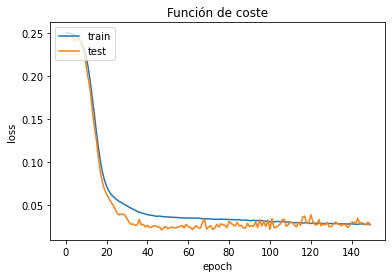

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de coste')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, precision_score
Yz_pred = modelo.predict(Z_test, batch_size=32)
print(Yz_pred)
Yz_exp = Yz_test.to_numpy()
for i in range(len(Yz_pred)):
  Yz_pred[i] = np.array([1 if Yz_pred[i][j] == np.max(Yz_pred[i]) else 0 for j in range(len(Yz_pred[i]))])
  

print(accuracy_score(Yz_exp, Yz_pred))
print(classification_report(Yz_exp, Yz_pred))

matriz_confusion = multilabel_confusion_matrix(Yz_exp, Yz_pred)

[[0.9900653  0.0099348 ]
 [0.00737272 0.9926273 ]
 [0.99003255 0.00996747]
 ...
 [0.9900782  0.00992179]
 [0.00736229 0.99263775]
 [0.98993826 0.01006171]]
0.9644012944983819
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       330
           1       0.97      0.95      0.96       288

   micro avg       0.96      0.96      0.96       618
   macro avg       0.96      0.96      0.96       618
weighted avg       0.96      0.96      0.96       618
 samples avg       0.96      0.96      0.96       618



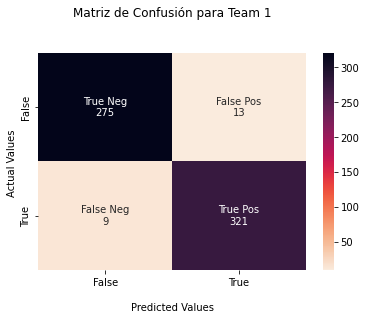

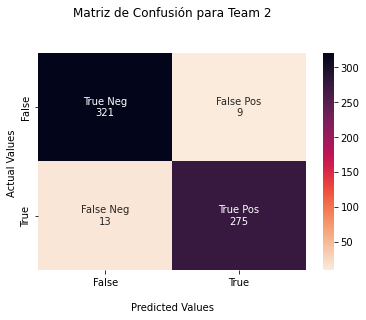

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

clases = ['Team 1', 'Team 2']

for i, matrix in enumerate(matriz_confusion):
  labels = [f'True Neg\n{matrix[0][0]}',f'False Pos\n{matrix[0][1]}',f'False Neg\n{matrix[1][0]}',f'True Pos\n{matrix[1][1]}']

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(matriz_confusion[1], annot=labels, fmt='', cmap='rocket_r')

  ax.set_title(f'Matriz de Confusión para {clases[i]}\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [89]:
def activation(x):
  return ((1/(1+np.e**(-x))) , (x * (1-x)))


class Capa():
  def __init__(self, n_conexiones: int, n_neuronas: int, activation):
    self.activation = activation
    self.W = np.random.rand(n_conexiones, n_neuronas) * 2 - 1


def crear_red(topologia: list, activation):
  red = []
 
  for l, capa in enumerate(topologia[:-1]):
    red.append( Capa(topologia[l], topologia[l+1], activation) )
  return red


def forward(red, X):
  out = [(None, X)]
  for l, capa in enumerate(red):
    z = out[-1][1] @ red[l].W 
    a = red[l].activation(z)[0] 
    out.append((z, a)) 
  return out


In [90]:
p = 16
topologia = [p, 20, 30, 20, 12, 2]
red = crear_red(topologia, activation)
prediccion = forward(red, Z_train)


In [91]:
def coste(Ypred, Yesp):
  return (np.mean((Ypred - Yesp) ** 2), (Ypred - Yesp))

In [92]:
def train(red, X, Y, coste, learning_rate=0.05):

  out = forward(red, X)

  delta = []

  for i in reversed(range(0,len(red))):
    z = out[i+1][0]
    a = out[i+1][1]
    if i == len(red)-1:

        delta.insert(0, coste(a,Y)[1] * red[i].activation(a)[1] )
    else:
       
        delta.insert(0, delta[0] @ aux_W.T * red[i].activation(a)[1]) 
    aux_W = red[i].W

    red[i].W = red[i].W - out[i][1].T @ delta[0] * learning_rate 

  return out[-1][1]

c:\Python39\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Coste iteración 0: 1    0.290985
2    0.286181
dtype: float64
Coste iteración 25: 1    0.518010
2    0.518009
dtype: float64
Coste iteración 50: 1    0.518003
2    0.518001
dtype: float64
Coste iteración 75: 1    0.517985
2    0.517983
dtype: float64
Coste iteración 100: 1    0.517882
2    0.517888
dtype: float64
Coste iteración 125: 1    0.516240
2    0.517796
dtype: float64
Coste iteración 150: 1    0.475094
2    0.518018
dtype: float64
Coste iteración 175: 1    0.481842
2    0.518018
dtype: float64
Coste iteración 200: 1    0.481775
2    0.518018
dtype: float64
Coste iteración 225: 1    0.481556
2    0.518017
dtype: float64
Coste iteración 250: 1    0.461638
2    0.518018
dtype: float64
Coste iteración 275: 1    0.035779
2    0.518001
dtype: float64
Coste iteración 300: 1    0.031843
2    0.518001
dtype: float64
Coste iteración 325: 1    0.031014
2    0.518002
dtype: float64
Coste iteración 350: 1    0.028419
2    0.518000
dtype: float64
Coste iteración 375: 1    0.026529
2    0.517

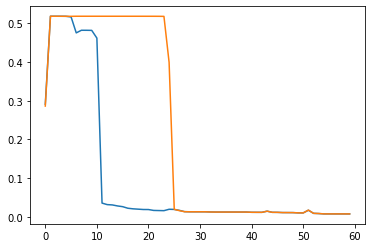

In [93]:
import time 
from IPython.display import clear_output
loss = []

for i in range(1500):

  pY = train(red, Z_train.to_numpy(), Yz_train.to_numpy(), coste, learning_rate=0.05)
  if i % 25 == 0:
    costo = coste(pY, Yz_train)[0]
    print(f'Coste iteración {i}: {costo}')
    loss.append(costo)
    

    
plt.plot(range(len(loss)), loss)
plt.show()



In [94]:
prediccion = forward(red, Z_test)
Yz_pred = prediccion[-1][1].to_numpy()
print(prediccion[-1][1])
Yz_exp = Yz_test.to_numpy()
for i in range(len(Yz_pred)):
  Yz_pred[i] = np.array([1 if Yz_pred[i][j] == np.max(Yz_pred[i]) else 0 for j in range(len(Yz_pred[i]))])
  

print(accuracy_score(Yz_exp, Yz_pred))
print(classification_report(Yz_exp, Yz_pred))

matriz_confusion = multilabel_confusion_matrix(Yz_exp, Yz_pred)


              0         1
4006   0.998152  0.000086
33837  0.006208  0.994459
30355  0.998129  0.000088
41270  0.998139  0.000087
14973  0.015732  0.985486
...         ...       ...
12420  0.010153  0.990766
28509  0.998150  0.000087
43399  0.998153  0.000086
32557  0.006175  0.994488
14062  0.998097  0.000091

[618 rows x 2 columns]
0.9676375404530745
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       330
           1       0.99      0.94      0.96       288

   micro avg       0.97      0.97      0.97       618
   macro avg       0.97      0.97      0.97       618
weighted avg       0.97      0.97      0.97       618
 samples avg       0.97      0.97      0.97       618



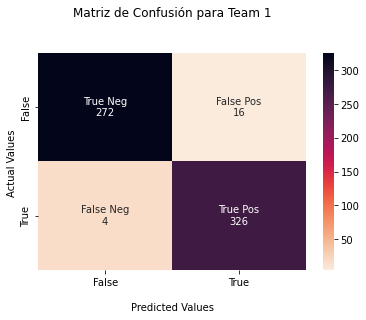

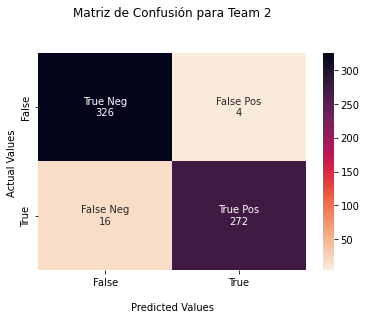

In [95]:
for i, matrix in enumerate(matriz_confusion):
  labels = [f'True Neg\n{matrix[0][0]}',f'False Pos\n{matrix[0][1]}',f'False Neg\n{matrix[1][0]}',f'True Pos\n{matrix[1][1]}']

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(matriz_confusion[1], annot=labels, fmt='', cmap='rocket_r')

  ax.set_title(f'Matriz de Confusión para {clases[i]}\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [96]:
from sklearn.neural_network import MLPClassifier
#[p, 20, 30, 20, 12, 2]
mlp = MLPClassifier(solver='lbfgs', alpha=0.05, random_state=0, activation='relu', max_iter=10000, hidden_layer_sizes=[20, 30, 20, 12]) #alpha default 0.001, max_iter=200
mlp.fit(Z_train, Yz_train)

print("Precision con el set de entrenamiento: ", mlp.score(Z_train, Yz_train))
print("Precision con el set de pruebas: ", mlp.score(Z_test,Yz_test))

Precision con el set de entrenamiento:  0.9895977808599168
Precision con el set de pruebas:  0.9563106796116505
